## Introduction 
- Esther Hsiao
- Yuerong Hu
- Sam Walkow

Project Type II: 

The Semantic Agreement between Fictional Corpus and Real-Word Incidents: a Case Study on the Song Lyrics and News between 2000-2015.

We wanted to looked at possible connections between text in news articles and popular song lyrics in the United States for the past two decades. We wanted to see if we could detect a social pattern in two areans of written expression. We used three datasets and two different text analysis approaches to explore this potential connection. 



### Hypothesis

1. Popular songs (lyrics) and news coming out during the same period of time (etc, five years from 2000 to 2005) share certain features that were shaped by the culture and theme of the society during that period.
2. There will be a time delay between the similar groups of topics extracted from popular songs and those of the news. Since news always comes out quickly right after the things happened, while it takes a long time to write and publish a song.


### Song/Lyrics Dataset

- Songs datasets from BillBoard 100 list from 1964 to 2015 with data including artist, song title, song lyrics, years and source


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import bqplot as bq

In [2]:
df = pd.read_csv("raw_data/billboard_lyrics_1964-2015.csv", encoding = "ISO-8859-1")
df.head(5)

,Rank,Song,Artist,Year,Lyrics,Source
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0
2,3,i cant get no satisfaction,the rolling stones,1965,,1.0
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0


### News Datasets

- News datasets from the New York Times from 2001 to 2008 and from 2009 to 2012 in xml format including columns such as headlines, authors, article content, date published, publication. 
- The two dataset had to be combined

In [3]:
news1 = open("raw_data/NewYorkTimes_CoverStory_2001-2008_2013_2015.xml", "r") 

news = news1.readlines(400)

for n in news:
    print(n)

<records>

<rec resultID="1">

  <header shortDbName="nfh" longDbName="Newspaper Source" uiTerm="112016488">

    <controlInfo>

      <bkinfo />

      <jinfo>

        <jtl>New York Times</jtl>

        <issn>03624331</issn>

      </jinfo>

      <pubinfo>

        <dt year="2015" month="12" day="31">12/31/2015</dt>

        <vid>165</vid>

        <iid>57097</iid>

      </pubinfo>

      <artinfo>

        <ppf>A1</ppf>



### Data Exploration

After cleaning and combining the datasets, we begin exploring the text that makes up the news articles and song lyrics.  

### Term Frequency–Inverse Document Frequency (TF-IDF) Analysis
 - is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus

In [4]:
df_tfidf_top = pd.read_csv("TFIDF_top_terms.csv")
df_tfidf_top

,Year,N_term,N_tfidf,S_term,S_tfidf
0,2001,dam,0.693136,woh,0.801355
1,2001,diesel,0.621050,ur,0.691662
2,2001,airline,0.590448,music,0.689353
3,2001,twa,0.575046,clean,0.588263
4,2001,code,0.500847,fresh,0.427828
...,...,...,...,...,...
1495,2015,rubio,0.237706,hotline,0.162913
1496,2015,keystone,0.235868,next,0.162681
1497,2015,reject,0.235868,summer,0.161925
1498,2015,environmental,0.235868,uma,0.161200


In [5]:
from_2001_to_2005 = df_tfidf_top[(df_tfidf_top['Year'] == 2001) | (df_tfidf_top['Year'] == 2002)|
                                (df_tfidf_top['Year'] == 2003) | (df_tfidf_top['Year'] == 2004) |
                                (df_tfidf_top['Year'] == 2005)]

from_2006_to_2010 = df_tfidf_top[(df_tfidf_top['Year'] == 2006) | (df_tfidf_top['Year'] == 2007)|
                                (df_tfidf_top['Year'] == 2008) | (df_tfidf_top['Year'] == 2009) |
                                (df_tfidf_top['Year'] == 2010)]

from_2011_to_2015 = df_tfidf_top[(df_tfidf_top['Year'] == 2011) | (df_tfidf_top['Year'] == 2012)|
                                (df_tfidf_top['Year'] == 2013) | (df_tfidf_top['Year'] == 2014) |
                                (df_tfidf_top['Year'] == 2015)]

In [6]:
sns.set()

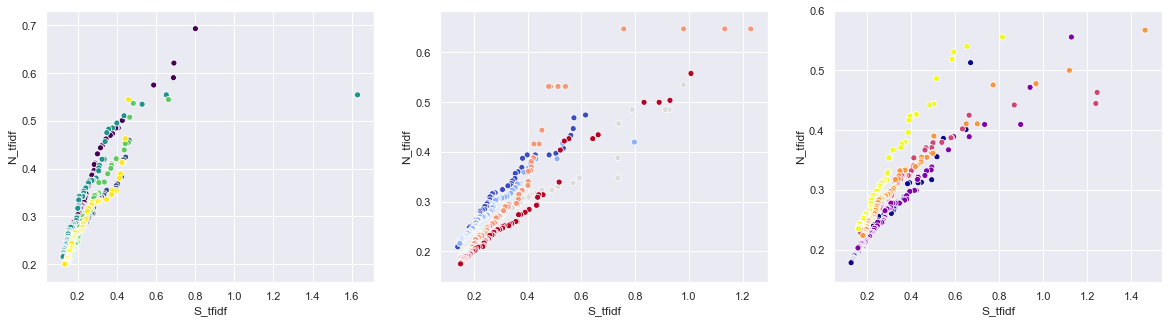

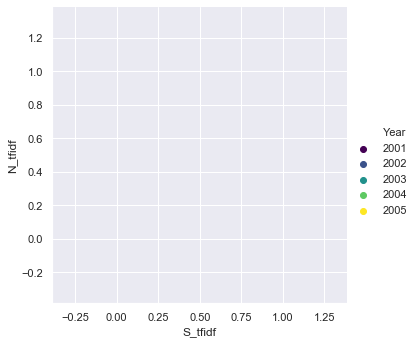

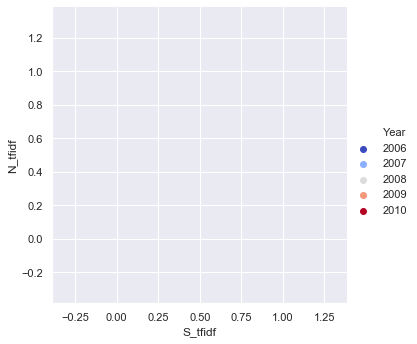

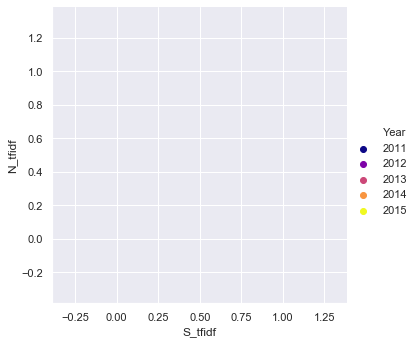

In [75]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,5))
sns.relplot(x="S_tfidf", y="N_tfidf", legend="full", kind='scatter', hue="Year", palette='viridis',
data=from_2001_to_2005, ax=ax1)
sns.relplot(x="S_tfidf", y="N_tfidf", legend="full", kind='scatter', hue="Year", palette='coolwarm',
data=from_2006_to_2010, ax = ax2)
sns.relplot(x="S_tfidf", y="N_tfidf", legend="full", kind='scatter', hue="Year", palette='plasma',
data=from_2011_to_2015, ax =ax3)

plt.show()

In [8]:
df_tfidf_both = pd.read_csv("TFIDF_found_in_both.csv")
print(df_tfidf_both.columns)

Index(['Window_ID', 'NewsYR/SongYR', 'N_in_both', 'words_in_both'], dtype='object')


In [44]:
df_tfidf_both[["NewsYR", "SongYR"]] = df_tfidf_both["NewsYR/SongYR"].str.split('/',expand=True)

In [53]:
df_tfidf_both["Year_diff"] = abs(pd.to_numeric(df_tfidf_both["SongYR"]) - pd.to_numeric(df_tfidf_both["NewsYR"]))

In [54]:
print(df_tfidf_both[df_tfidf_both.words_in_both.str.len().gt(1)])

    Window_ID NewsYR/SongYR  N_in_both             words_in_both NewsYR  \
0           1     2001/2001          1                     space   2001   
1           1     2001/2002          1                     woman   2001   
3           1     2001/2004          1                      burn   2001   
9           2     2002/2006          3       california|knew|lay   2002   
11          3     2003/2004          1                      life   2003   
12          3     2003/2005          2                de|soldier   2003   
14          3     2003/2007          3            de|north|party   2003   
16          4     2004/2005          1                 september   2004   
21          5     2005/2006          1                     sugar   2005   
22          5     2005/2007          2                 arm|north   2005   
24          5     2005/2009          4      arm|game|hotel|sugar   2005   
27          6     2006/2008          1                      bill   2006   
28          6     2006/20

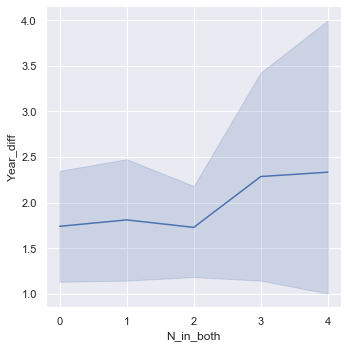

In [69]:
sns.relplot(x="N_in_both", y="Year_diff", legend="full", kind='line', palette='viridis',
data=df_tfidf_both)

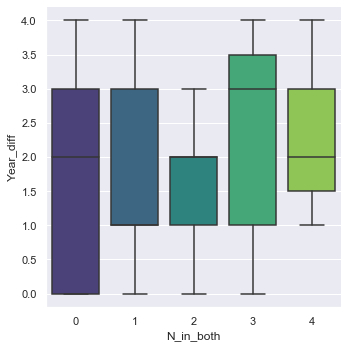

In [76]:
sns.catplot(x="N_in_both", y="Year_diff", 
            kind="box", legend="full",palette='viridis', data=df_tfidf_both);

### Topic Modeling

#### Summary

### Sentiment Analysis

In [11]:
df_sentiment_lyrics = pd.read_csv("LyricsSentimentScores.csv")
df_sentiment_lyrics.head(10)

,Unnamed: 0,pos,neg,neu,comp,tag
0,0,0.180,0.110,0.710,0.9269,2001
1,1,0.413,0.148,0.439,0.9924,2001
2,2,0.336,0.124,0.540,0.9977,2001
3,3,0.228,0.011,0.761,0.9921,2001
4,4,0.250,0.229,0.521,0.7184,2001
5,5,0.042,0.230,0.728,-0.9891,2001
6,6,0.117,0.241,0.642,-0.9927,2001
7,7,0.343,0.137,0.519,0.9744,2001
8,8,0.136,0.319,0.546,-0.9847,2001
9,9,0.218,0.052,0.730,0.9942,2001


In [12]:
df_sentiment_news = pd.read_csv("NewsSentimentScores.csv")
df_sentiment_news.head(10)

,Unnamed: 0,pos,neg,neu,comp,tag
0,0,0.083,0.404,0.513,-0.9729,2001
1,1,0.080,0.160,0.760,-0.7096,2001
2,2,0.156,0.131,0.713,0.2732,2001
3,3,0.083,0.239,0.678,-0.7430,2001
4,4,0.186,0.328,0.485,-0.8957,2001
5,5,0.000,0.000,1.000,0.0000,2001
6,6,0.232,0.128,0.640,0.3400,2001
7,7,0.051,0.167,0.781,-0.6369,2001
8,8,0.000,0.199,0.801,-0.8020,2001
9,9,0.200,0.000,0.800,0.8412,2001


In [13]:
df_sentiment_stats = pd.read_csv("output/sentiment_scores_stats.csv")
df_sentiment_stats.head(8)

,Unnamed: 0,item,value,item.1,value.1,item.2,value.2,item.3,value.3,item.4,value.4,item.5,value.5,item.6,value.6,item.7,value.7
0,0,count,1466.000000,count,1466.000000,count,1466.000000,count,1466.000000,count,1466.000000,count,1466.000000,count,1466.000000,count,1466.000000
1,1,mean,0.219333,mean,0.118892,mean,0.132190,mean,0.127870,mean,0.648499,mean,0.753253,mean,0.412852,mean,-0.045261
2,2,std,0.113434,std,0.086835,std,0.091082,std,0.109751,std,0.120582,std,0.120201,std,0.822189,std,0.657799
3,3,min,0.000000,min,0.000000,min,0.000000,min,0.000000,min,0.253000,min,0.325000,min,-0.999800,min,-0.990000
4,4,25%,0.136000,25%,0.054000,25%,0.068000,25%,0.042000,25%,0.565000,25%,0.669000,25%,-0.573575,25%,-0.718400
5,5,50%,0.203500,50%,0.109000,50%,0.110500,50%,0.107000,50%,0.657500,50%,0.759000,50%,0.961200,50%,0.000000
6,6,75%,0.286000,75%,0.171000,75%,0.182750,75%,0.196000,75%,0.734000,75%,0.837000,75%,0.992000,75%,0.585900
7,7,max,0.747000,max,0.497000,max,0.594000,max,0.568000,max,1.000000,max,1.000000,max,0.999800,max,0.983300


In [14]:
sns.catplot(x="pos", y="tag", hue="tag",
            kind="swam", data=df_sentiment_lyrics)


ValueError: Plot kind 'swam' is not recognized

#### Summary

## Conclusions